# Importing Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/FYP/FYP - 1/DS Project/onlinefraud.csv')


df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


#1 - Cleaning

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


# Checking for missing values and duplicates

In [ ]:
# Checking for missing values
print(df.isnull().sum())

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [ ]:
# Checking for duplicates
duplicates = df[df.duplicated()]

if duplicates.shape[0] == 0:
    print("Duplicate Check: No duplicate rows found.")
else:
    print(f"Duplicate Check: {duplicates.shape[0]} duplicate rows found.")

Duplicate Check: No duplicate rows found.


# Dropping outlier rows (0.1-0.9 kept)

In [ ]:
# Define a function to remove outliers using IQR - Inter Quartile Range
def remove_outliers_iqr(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.1)
        Q3 = df[column].quantile(0.9)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Numerical columns for which we want to remove outliers
numerical_columns = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

# Removing outliers
df_cleaned = remove_outliers_iqr(df, numerical_columns)

# Checking the shape of the cleaned dataset
print("Original dataset shape:", df.shape)
print("Cleaned dataset shape:", df_cleaned.shape)

df = df_cleaned

Original dataset shape: (6362620, 11)
Cleaned dataset shape: (5238012, 11)


# Handling Class Imbalance

In [ ]:
import pandas as pd
import numpy as np

# Select all rows with isFraud == True
fraudulent_rows = df[df['isFraud'] == True]

# Undersampling non-fraudulent rows
non_fraud_needed = len(fraudulent_rows)

# Select non-fraudulent rows randomly to meet the required count
non_fraudulent_rows = df[df['isFraud'] == False].sample(n=non_fraud_needed, random_state=42)

# Concatenate the two DataFrames to get the final selection
selected_rows = pd.concat([fraudulent_rows, non_fraudulent_rows])

# Reset the index
selected_rows.reset_index(drop=True, inplace=True)

In [ ]:
df = selected_rows.sample(frac=1.0, random_state=42)

In [ ]:
df.reset_index(drop=True)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,608,PAYMENT,4775.59,C60093576,205278.00,200502.41,M1756426094,0.00,0.00,0,0
1,149,TRANSFER,661558.27,C644461702,661558.27,0.00,C1700734681,0.00,0.00,1,0
2,84,TRANSFER,152331.26,C397720555,152331.26,0.00,C1006668962,0.00,0.00,1,0
3,667,TRANSFER,71554.74,C118393699,71554.74,0.00,C1077131612,0.00,0.00,1,0
4,719,CASH_OUT,119306.06,C1199258183,119306.06,0.00,C136557058,4040.44,123346.50,1,0
...,...,...,...,...,...,...,...,...,...,...,...
10367,355,CASH_OUT,201609.43,C1538872419,100719.00,0.00,C1021781480,433899.68,635509.12,0,0
10368,165,PAYMENT,7197.79,C12949149,248.41,0.00,M1496540464,0.00,0.00,0,0
10369,183,CASH_OUT,242460.56,C2056194555,0.00,0.00,C699459605,360923.83,603384.39,0,0
10370,109,TRANSFER,252417.45,C1220229602,252417.45,0.00,C1660826618,0.00,0.00,1,0


In [ ]:
df.to_csv("/content/drive/MyDrive/FYP/FYP - 1/DS Project/cleaned_dataset_unchanged.csv", index=False)

#2 - Transformation

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10372 entries, 7516 to 7270
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            10372 non-null  int64  
 1   type            10372 non-null  object 
 2   amount          10372 non-null  float64
 3   nameOrig        10372 non-null  object 
 4   oldbalanceOrg   10372 non-null  float64
 5   newbalanceOrig  10372 non-null  float64
 6   nameDest        10372 non-null  object 
 7   oldbalanceDest  10372 non-null  float64
 8   newbalanceDest  10372 non-null  float64
 9   isFraud         10372 non-null  int64  
 10  isFlaggedFraud  10372 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 972.4+ KB


In [ ]:
df_for_visualization = df.copy()

Text(0.5, 1.0, 'Distribution of Transaction Types')

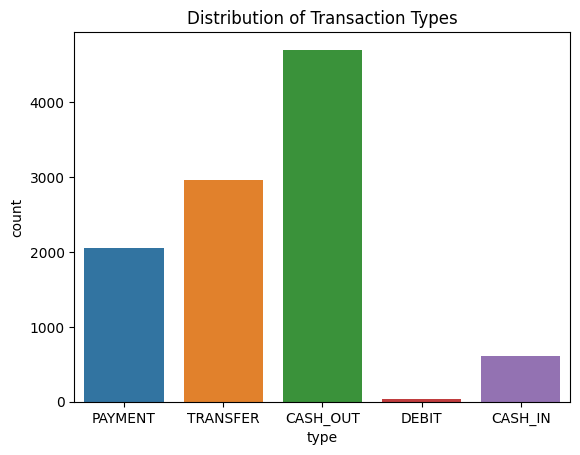

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#Unique values for type column
sns.countplot(data=df_for_visualization, x='type')
plt.title("Distribution of Transaction Types")

In [ ]:
#One hot encoding type column
df = pd.get_dummies(df, columns=['type'], drop_first=True)

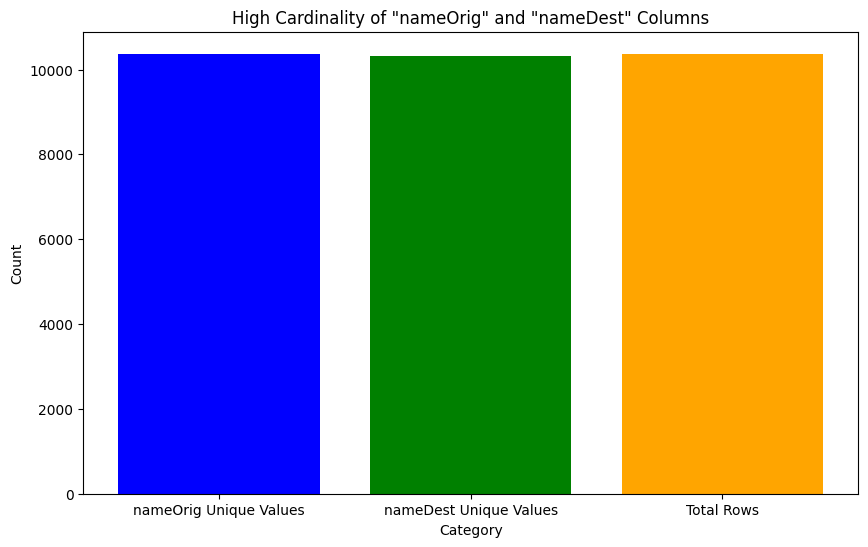

In [ ]:
import matplotlib.pyplot as plt

# Calculate the unique value count for both columns and the total number of rows
unique_count_nameOrig = df['nameOrig'].nunique()
unique_count_nameDest = df['nameDest'].nunique()
total_rows = df.shape[0]

# Create a bar plot to visualize the unique value counts for both columns
plt.figure(figsize=(10, 6))
plt.bar(['nameOrig Unique Values', 'nameDest Unique Values', 'Total Rows'],
        [unique_count_nameOrig, unique_count_nameDest, total_rows],
        color=['blue', 'green', 'orange'])
plt.title('High Cardinality of "nameOrig" and "nameDest" Columns')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

In [ ]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 2.0 MB/s eta 0:00:00


In [ ]:
import category_encoders as ce

# Create a hasher object
hasher = ce.HashingEncoder(n_components=100)

# Fit and transform the nameOrig data
transformed_namesOrig = hasher.fit_transform(df['nameOrig'])

In [ ]:
# Create a hasher object
hasher = ce.HashingEncoder(n_components=100)

# Fit and transform the nameDest data
transformed_namesDest = hasher.fit_transform(df['nameDest'])

#Dimentionality Reduction

In [ ]:
# Apply PCA to the hashed nameOrig
n_components = 10
pca = PCA(n_components=n_components)
pca_result = pca.fit_transform(transformed_namesOrig)
pca_result
# Create a new DataFrame with reduced dimensionality features and meaningful column names
column_names = [f'PCA_{i}' for i in range(1, n_components + 1)]
df_reduced_names_Orig = pd.DataFrame(data=pca_result, columns=column_names)

In [ ]:
# Apply PCA to the hashed nameDest
n_components = 10
pca = PCA(n_components=n_components)
pca_result = pca.fit_transform(transformed_namesDest)
pca_result
# Create a new DataFrame with reduced dimensionality features and meaningful column names
column_names = [f'PCA_{i+10}' for i in range(1, n_components + 1)]
df_reduced_namesDest = pd.DataFrame(data=pca_result, columns=column_names)

In [ ]:
# Concatenate the original DataFrame with the transformed data
df = pd.concat([df, df_reduced_names_Orig, df_reduced_namesDest], axis=1)

#Dropping nameOrig and nameDest columns
df.drop(columns=['nameOrig', 'nameDest'], inplace=True)

In [ ]:
# Standardize the data
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [ ]:
df_scaled.reset_index()

,index,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_OUT,...,PCA_11,PCA_12,PCA_13,PCA_14,PCA_15,PCA_16,PCA_17,PCA_18,PCA_19,PCA_20
0,0,1.558735,-0.888065,0.198309,1.442172,-0.470272,-0.559602,-1.0,-0.013888,-0.910646,...,1.526296,-1.269600,-0.809452,1.187682,-2.380439,1.417895,1.386426,0.763871,0.335322,0.534800
1,1,-0.794754,2.228654,2.280986,-0.290267,-0.470272,-0.559602,1.0,-0.013888,-0.910646,...,0.060346,-0.356268,-0.701412,-0.203043,0.262113,0.624011,-1.364744,1.311201,-0.440138,-1.214210
2,2,-1.128036,-0.187849,-0.043365,-0.290267,-0.470272,-0.559602,1.0,-0.013888,-0.910646,...,0.420820,0.233733,-0.328308,-0.117120,0.224494,-0.577604,-0.441464,-0.562324,-0.420822,0.151654
3,3,1.861253,-0.571169,-0.412067,-0.290267,-0.470272,-0.559602,1.0,-0.013888,-0.910646,...,0.028947,-0.703486,0.220668,0.975173,0.073909,0.944918,-0.174824,0.310142,-1.030020,-2.094145
4,4,2.127879,-0.344568,-0.194108,-0.290267,-0.465219,-0.416965,1.0,-0.013888,1.098121,...,0.148732,-0.039046,0.222071,-0.226776,0.376439,-0.131757,0.025059,0.136663,0.612057,-0.053762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10367,10367,0.261496,0.045997,-0.278948,-0.290267,0.072429,0.175294,-1.0,-0.013888,1.098121,...,-0.146701,0.116124,0.276484,1.019170,0.448667,-0.028974,-1.251837,-0.108854,-1.221241,-0.907948
10368,10368,-0.712715,-0.876570,-0.737543,-0.290267,-0.470272,-0.559602,-1.0,-0.013888,-0.910646,...,0.357682,0.223485,-0.142726,-0.075087,-0.083529,0.002632,0.320626,0.539101,-0.279465,-0.650893
10369,10369,-0.620421,0.239853,-0.738677,-0.290267,-0.018845,0.138145,-1.0,-0.013888,1.098121,...,0.505205,-0.232493,-0.173146,-0.121907,0.978631,0.184495,-1.484419,1.507264,1.285591,1.486562
10370,10370,-0.999851,0.287103,0.413475,-0.290267,-0.470272,-0.559602,1.0,-0.013888,-0.910646,...,1.526296,-1.269600,-0.809452,1.187682,-2.380439,1.417895,1.386426,0.763871,0.335322,0.534800


#3 - Data Validation

Data Validation Summary:
Accuracy: No accuracy issues found.
Consistency Issue: Data consistency problem found.
Completeness: Data is complete.
Duplicate Check: No duplicate rows found.
All columns have appropriate data types.
Target variable 'isFraud' is present.


        Validation Check                                    Status
0               Accuracy                 No accuracy issues found.
1            Consistency           Data consistency problem found.
2           Completeness                         Data is complete.
3             Duplicates                  No duplicate rows found.
4             Data Types  All columns have appropriate data types.
5  Categorical Variables           No categorical variables found.
6        Target Variable     Target variable 'isFraud' is present.


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10372 entries, 7516 to 7270
Data columns (total 32 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  --

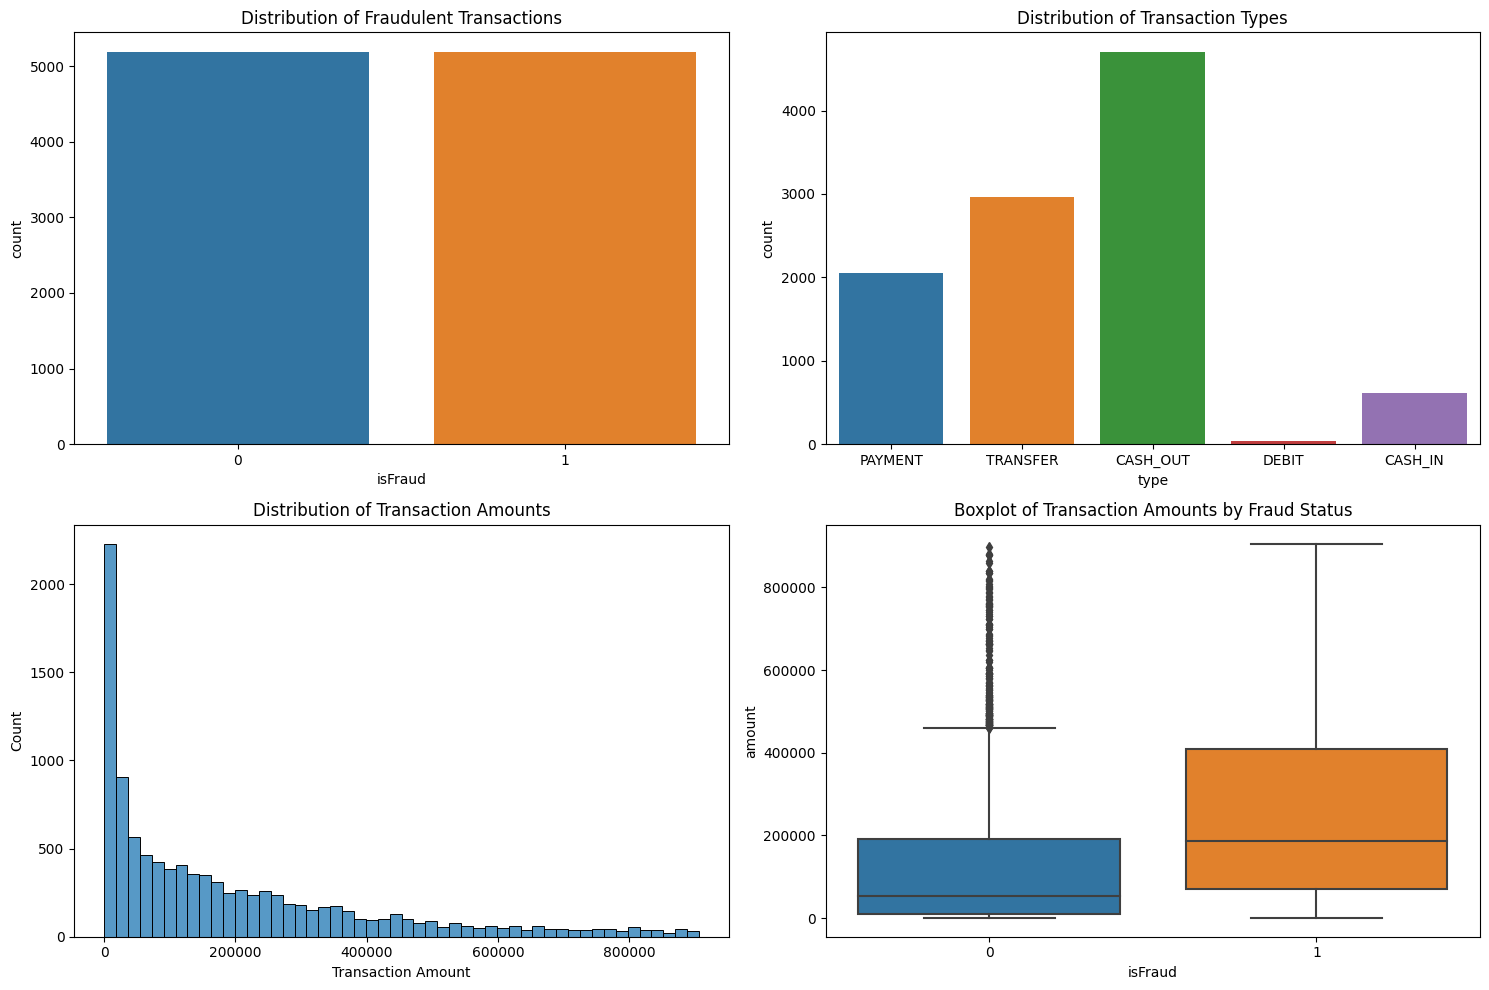

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Check for missing values
missing_values = df.isnull().sum()

# Check for duplicates
duplicates = df[df.duplicated()]

# Perform domain-specific validation
negative_amounts = df[df['amount'] < 0]
inconsistent_balance = df[df['oldbalanceOrg'] > df['newbalanceOrig']]

# Define conditions for accuracy and consistency checks
accuracy_condition = (df['isFraud'] == 0) & (df['amount'] < 0)

# Check if 'oldbalanceOrg' is greater than 'newbalanceOrig' for non-fraudulent transactions
consistency_condition = (df['isFraud'] == 0) & (df['oldbalanceOrg'] > df['newbalanceOrig'])

# Calculate accuracy and consistency flags
accuracy_flag = accuracy_condition.any()
consistency_flag = consistency_condition.any()

# Getting Data validation summary
print("Data Validation Summary:")
if accuracy_flag:
    print("Accuracy Issue: Inaccurate data found.")
else:
    print("Accuracy: No accuracy issues found.")

if consistency_flag:
    print("Consistency Issue: Data consistency problem found.")
else:
    print("Consistency: No consistency issues found.")

if missing_values.sum() == 0:
    print("Completeness: Data is complete.")
else:
    print("Completeness: Data has missing values.")

if duplicates.shape[0] == 0:
    print("Duplicate Check: No duplicate rows found.")
else:
    print(f"Duplicate Check: {duplicates.shape[0]} duplicate rows found.")

# Check Data Types
if not df.select_dtypes(include=['number']).empty:
    print("All columns have appropriate data types.")
else:
    print("Some columns have inappropriate data types. You may need to convert or encode them.")

categorical_columns = df.select_dtypes(include=['object', 'uint8', 'category']).columns

# Check Target Variable (isFraud)
if 'isFraud' in df.columns:
    print("Target variable 'isFraud' is present.")
else:
    print("Target variable 'isFraud' is missing. You need a target variable for supervised learning.")

# Data Validation Summary
data_validation_summary = {
    'Validation Check': ['Accuracy', 'Consistency', 'Completeness', 'Duplicates', 'Data Types', 'Categorical Variables', 'Target Variable'],
    'Status': [
        'Inaccurate data found.' if accuracy_flag else 'No accuracy issues found.',
        'Data consistency problem found.' if consistency_flag else 'No consistency issues found.',
        'Data has missing values.' if missing_values.sum() > 0 else 'Data is complete.',
        f'{duplicates.shape[0]} duplicate rows found.' if duplicates.shape[0] > 0 else 'No duplicate rows found.',
        'Some columns have inappropriate data types. You may need to convert or encode them.' if df.select_dtypes(include=['number']).empty else 'All columns have appropriate data types.',
        'Categorical variables found. You may need to encode them (e.g., one-hot encoding).' if categorical_columns.empty else 'No categorical variables found.',
        "Target variable 'isFraud' is missing. You need a target variable for supervised learning." if 'isFraud' not in df.columns else "Target variable 'isFraud' is present."
    ]
}

# Create DataFrame
df_summary = pd.DataFrame(data_validation_summary)

# Print DataFrame
print(f"\n\n{df_summary}\n\n")

df.info()

# Visualizations
plt.figure(figsize=(15, 10))

# Distribution of Fraudulent Transactions
plt.subplot(2, 2, 1)
sns.countplot(data=df, x='isFraud')
plt.title("Distribution of Fraudulent Transactions")

# Distribution of Transaction Types
plt.subplot(2, 2, 2)
sns.countplot(data=df_for_visualization, x='type')
plt.title("Distribution of Transaction Types")

# Distribution of Transaction Amounts
plt.subplot(2, 2, 3)
sns.histplot(data=df, x='amount', bins=50)
plt.title("Distribution of Transaction Amounts")
plt.xlabel("Transaction Amount")

# Boxplot of Transaction Amounts by Fraud Status
plt.subplot(2, 2, 4)
sns.boxplot(data=df, x='isFraud', y='amount')
plt.title("Boxplot of Transaction Amounts by Fraud Status")

plt.tight_layout()
plt.show()

In [ ]:
df.to_csv("/content/drive/MyDrive/FYP/FYP - 1/DS Project/cleaned_dataset.csv", index=False)